In [14]:
# import packages
import sys
sys.path.append('../')
import pickle
import pandas as pd
import re

In [9]:
#load labelled data (generated in file 2.preprocessing_en)
data = pd.read_pickle('data_n_models/de_df_labelled.pkl')

In [10]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma
0,1,1079317443523297280,12303,Boulder667,viel spaß damit eine wahl zu gewinnen stellt e...,0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,"(viel, spaß, damit, eine, wahl, gewinnen, stel...",viel spaß damit einen wahl gewinnen stellen si...
1,4,310342425,11476,AndyBaldauf,aber erst wenn sie wieder dürfen playfullness,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,"(aber, erst, wenn, sie, wieder, dürfen, playfu...",aber erst wenn ich wieder dürfen playfullness
2,10,793418126532734976,521,MILESmobility,good news alle interessierten mitarbeiterinnen...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,"(good, news, alle, interessierten, mitarbeiter...",good news all interessieren mitarbeiterinnen d...
3,11,1119231287078858752,23,pici1303,ich weiß dass der schein da rein muss aber ist...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,"(ich, weiß, dass, der, schein, rein, muss, abe...",ich weiß dass der schein rein muss aber sein m...
4,12,1119231287078858752,23,pici1303,ich hab mich nur gefragt wofür dieser extra co...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,"(ich, hab, mich, nur, gefragt, wofür, dieser, ...",ich hab sich nur fragen wofür dies extra code ...


In [12]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in df.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e|destroy|proxy)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [17]:
# apply function
data = classify_bots(data)

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
# create a df with only no bots
data = data[data['bot'] == False]
data.bot.value_counts()

False    2681
Name: bot, dtype: int64

In [22]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot
0,1,1079317443523297280,12303,Boulder667,viel spaß damit eine wahl zu gewinnen stellt e...,0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,"(viel, spaß, damit, eine, wahl, gewinnen, stel...",viel spaß damit einen wahl gewinnen stellen si...,False
1,4,310342425,11476,AndyBaldauf,aber erst wenn sie wieder dürfen playfullness,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,"(aber, erst, wenn, sie, wieder, dürfen, playfu...",aber erst wenn ich wieder dürfen playfullness,False
2,10,793418126532734976,521,MILESmobility,good news alle interessierten mitarbeiterinnen...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,"(good, news, alle, interessierten, mitarbeiter...",good news all interessieren mitarbeiterinnen d...,False
3,11,1119231287078858752,23,pici1303,ich weiß dass der schein da rein muss aber ist...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,"(ich, weiß, dass, der, schein, rein, muss, abe...",ich weiß dass der schein rein muss aber sein m...,False
4,12,1119231287078858752,23,pici1303,ich hab mich nur gefragt wofür dieser extra co...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,"(ich, hab, mich, nur, gefragt, wofür, dieser, ...",ich hab sich nur fragen wofür dies extra code ...,False


In [25]:
for i, value in data[1:20].lemma.iteritems():
    print(i, value)

1 aber erst wenn ich wieder dürfen playfullness
2 good news all interessieren mitarbeiterinnen der berliner erhalten täglich einen mobilitätsbudget höhe von der ich für fahrten mit miles einlösen können danke der der ganze aktion sponsern
3 ich weiß dass der schein rein muss aber sein mit der einzeln code auf der bild der sein einen aufkleber muss der auch auf der paket
4 ich hab sich nur fragen wofür dies extra code sein
5 ich hab doch schon der rücksendeschein draufgeklebt der sein mit dabei
6 bestellen heute noch immer nicht eintreffen service
7 der sein echt zum mäusemelken
8 solche lose
9 wie gut dass ich auch genau der nicht tun habe
10 hey meinen bestellung werden nie aus der packstation entnehmen und sein nachweislich zurücksenden werden dennoch bekommen ich von sich einen mahnung soll der 😡 😡 😡 zalandofail
11 hallo wann haben mein endlich ein rabatt code für sich 😭 😭 😫 😫 ich sein auf entzug ich shoppen zalandopluskunde
12 habe gerade beim mitbewerber bestellen und zahlen dort 

In [44]:
def define_team(df):
    pattern_payment = r"(packstation|mahnung|rechnung|zahlung|ausgleich|schlussrechnung|kassenbeleg|quittung|kassenbon|budget|voranschlag|belastung|abrechnung|aufstellung|summe|betrag|abgabe|auszahlung|gebühr|vorkasse|kreditkarte|debit|schulden)"

    pattern_logistics= r"(packstation|transport|lager|lagerung|verkehr|verpackung|logistik|einhaltung|erfüllung|beachtung|warten|termin)"

    pattern_weather = r"(Iembot|Iem)"

    pattern_fit = r"(size|fit|small|large|medium|schnitt|sitz|größe|design|art|style|form|zuschnitt|gestalt|ausführung)"

    pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"

    pattern_reco = r"(empfehlung|tipp|hilfe|hilfestellung|beistand|lehre|hinweis|rat|ratschlag)"

    pattern_sust = r"(nachhaltigkeit|umwelt|umweltfreundilich|zukunfsfähig|umgebung|natur|naturschutz|schutz|klima|klimawandel|nachhaltig)"

    pattern_outfit = r"(mode|fashion|aufzug|look|lifestyle|anzug|stil)"


    df['team'] = 'Other'
    for i, row in df.iterrows():
        
        match_logistics = re.findall(pattern_logistics, row.lemma, re.IGNORECASE) 
        if len(match_logistics) > 0:
            df['team'].loc[i] = 'Logistics'

        match_payment = re.findall(pattern_payment, row.lemma, re.IGNORECASE) 
        if len(match_payment) > 0:
            df['team'].loc[i] = 'Payment'

        match_weather = re.findall(pattern_weather, row['name'], re.IGNORECASE) 
        if len(match_weather) > 0:
            df['team'].loc[i] = 'Weather'

        match_fit = re.findall(pattern_fit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'Fit'

        match_catalog = re.findall(pattern_catalog, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'Catalog'
        
        match_sust = re.findall(pattern_sust, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'Sustainability'

        match_outfit = re.findall(pattern_outfit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'Sustainability'

    return df

In [45]:
teams = define_team(data)

C:\Users\deniz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot,team
0,1,1079317443523297280,12303,Boulder667,viel spaß damit eine wahl zu gewinnen stellt e...,0,"Liverpool, England",07-Mar-2021,116,False,...,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,"(viel, spaß, damit, eine, wahl, gewinnen, stel...",viel spaß damit einen wahl gewinnen stellen si...,False,Other
1,4,310342425,11476,AndyBaldauf,aber erst wenn sie wieder dürfen playfullness,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,...,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen playfullness,aber erst wenn sie wieder dürfen :-P,0.4995,"(aber, erst, wenn, sie, wieder, dürfen, playfu...",aber erst wenn ich wieder dürfen playfullness,False,Other
2,10,793418126532734976,521,MILESmobility,good news alle interessierten mitarbeiterinnen...,0,"Berlin, Deutschland",05-Mar-2021,766,False,...,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,"(good, news, alle, interessierten, mitarbeiter...",good news all interessieren mitarbeiterinnen d...,False,Payment
3,11,1119231287078858752,23,pici1303,ich weiß dass der schein da rein muss aber ist...,0,,04-Mar-2021,0,False,...,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,"(ich, weiß, dass, der, schein, rein, muss, abe...",ich weiß dass der schein rein muss aber sein m...,False,Other
4,12,1119231287078858752,23,pici1303,ich hab mich nur gefragt wofür dieser extra co...,0,,04-Mar-2021,0,False,...,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,"(ich, hab, mich, nur, gefragt, wofür, dieser, ...",ich hab sich nur fragen wofür dies extra code ...,False,Other


In [47]:
teams.team.value_counts()

Other        2172
Fit           420
Payment        60
Logistics      24
Weather         5
Name: team, dtype: int64

In [38]:
teams.lemma[0]

'viel spaß damit einen wahl gewinnen stellen sich mal einen vor der sich echte probleme kümmern zum beispiel wie mein können der luxemburg und irland beihilfe zur steuerhinterziehung lasten der deutsch steuerzahler begehen und firmen wie'

In [124]:
#testing results by checking random 10 tweets
sample = teams[teams.team == 'Fit'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

77287 SophieH95757128 @boohoo Birthday tomorrow!!! 😂😂 Your girl could do with an outfit for the house 🎉🎉
940 ZULIBLU Check out this listing I just added to my #Poshmark closet: ASOS Gold Yellow Fitted Hoodie XS. https://t.co/aZdwtYhAa8 #shopmycloset @poshmarkapp
42411 TheSoleWomens Brand new to ASOS! Cop the ultra-clean Nike AF1 Pixel Sail in every size now ✨

Link &gt; https://t.co/Mz8JqkDyk1 https://t.co/icKpWV1YO6
28878 saffkeeble @egirlmols Wtf that’s literally an average size i hate when clothing companies have 3 options for sizes because you order your size and it’s either far too big or too small so i tend to just shop on asos because it’s the only online clothing company i trust these days x
83655 HaniyaHussainy Can’t believe god really put me out here being broke , ugly and not skinny. Like you could’ve ATLEAST made me skinny so I could buy clothes from the clearance @asos  in my size.
99534 HolliexMay @boohoo Here’s Hendrix testing out his outfits for when lockdown ends 💅🏼 ht

<AxesSubplot:xlabel='team', ylabel='count'>

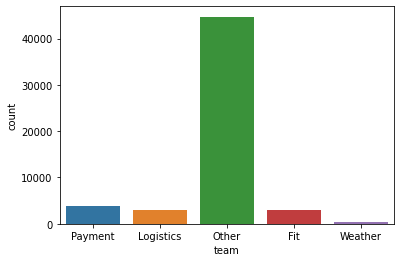

In [125]:
sns.countplot(data=teams, x='team')